In [261]:
import pandas as pd
import os

ot_odr_filename = os.path.join(".", "OT_ODR.csv.bz2")
ot_odr_df = pd.read_csv(ot_odr_filename, compression="bz2", sep=";")
longueur_ot_odr_df = len(ot_odr_df)

equipements_filename = os.path.join(".", 'EQUIPEMENTS.csv')
equipements_df = pd.read_csv(equipements_filename, sep=";")


In [262]:
equipements_df.tail()


,EQU_ID,MODELE,CONSTRUCTEUR,MOTEUR
4882,E00271009,MD023,C007,MT021
4883,E00341892,MD063,C007,MT023
4884,E00331551,MD005,C000,MT040
4885,E00373890,MD021,C011,MT0-1
4886,E00365136,MD032,C006,MT016


In [263]:
ot_odr_df.tail()

,OT_ID,ODR_ID,ODR_LIBELLE,TYPE_TRAVAIL,DUREE_TRAVAIL,SYSTEM_N1,SYSTEM_N2,SYSTEM_N3,EQU_ID,DATE_OT,KILOMETRAGE,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS,LIGNE
506553,OT000405952,OM000506539,REMPLACEMENT D'UN FEU DE RECUL,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00040793,2019-09-30 20:38:09,296005.373397,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/EXTERIEUR/DROIT,CASSE,L0283
506554,OT000405953,OM000506546,REMPLACEMENT D'UN ECLAIRAGE EXT,MECANIQUE,0.75,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00274690,2019-09-30 21:21:20,153050.080050,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/LATERAL,CASSE,L0116
506555,OT000405954,OM000506536,REMPLACEMENT D'UN PASSE SANS CONTACT,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,PASSE SANS CONTACT,E00256452,2019-09-30 21:39:29,175063.182439,AVTT,AVANT/PORTE,INTERMITTENT,L0134
506556,OT000405955,OM000506545,REMPLACEMENT D'UNE LAMPE DE FEU DE GABARIT,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00006122,2019-09-30 21:55:28,437053.614263,ECLAIRAGE FEUX EXTERIEURS,LATERAL/HAUT/GAUCHE,NE FONCTIONNE PAS,L0270
506557,OT000405956,OM000506547,REMPLACEMENT DE LA CASSETTE ENCREUSE D'UN VALI...,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,VALIDEUR MAGNETIQUE,E00315330,2019-09-30 23:43:42,83269.095630,AVTT,POSTE CONDUITE/AVANT,NE FONCTIONNE PAS,L0047


# Liste déroulante pour SIG_CONTEXTE

In [264]:
'''import pandas as pd

df = pd.DataFrame(ot_odr_df['SIG_CONTEXTE'])

# Création du dictionnaire
dictionnaire = {}

for _, row in df.iterrows():
    sig_contexte = row['SIG_CONTEXTE']
    contexte_parts = sig_contexte.split('/')
    
    # Parcourir les parties du contexte
    current_dict = dictionnaire
    for part in contexte_parts:
        # Vérifier si la partie existe dans le dictionnaire
        if part not in current_dict:
            current_dict[part] = {}
        
        # Passer au dictionnaire interne
        current_dict = current_dict[part]

print(dictionnaire)
print(dictionnaire['LATERAL']['HAUT'])
'''

"import pandas as pd\n\ndf = pd.DataFrame(ot_odr_df['SIG_CONTEXTE'])\n\n# Création du dictionnaire\ndictionnaire = {}\n\nfor _, row in df.iterrows():\n    sig_contexte = row['SIG_CONTEXTE']\n    contexte_parts = sig_contexte.split('/')\n    \n    # Parcourir les parties du contexte\n    current_dict = dictionnaire\n    for part in contexte_parts:\n        # Vérifier si la partie existe dans le dictionnaire\n        if part not in current_dict:\n            current_dict[part] = {}\n        \n        # Passer au dictionnaire interne\n        current_dict = current_dict[part]\n\nprint(dictionnaire)\nprint(dictionnaire['LATERAL']['HAUT'])\n"

## Stocker la liste dictionnaire

In [265]:
'''import pickle

path = 'liste_deroulante_SIG_CONTEXTE.pkl'

# Sérialisation du dictionnaire
with open(path,'wb') as fichier:
    pickle.dump(dictionnaire, fichier)

# Désérialisation du dictionnaire
with open(path, 'rb') as fichier:
    dictionnaire = pickle.load(fichier)
    '''

"import pickle\n\npath = 'liste_deroulante_SIG_CONTEXTE.pkl'\n\n# Sérialisation du dictionnaire\nwith open(path,'wb') as fichier:\n    pickle.dump(dictionnaire, fichier)\n\n# Désérialisation du dictionnaire\nwith open(path, 'rb') as fichier:\n    dictionnaire = pickle.load(fichier)\n    "

# Normaliser le texte

### Supprimer les caractères spéciaux

In [266]:
import unicodedata

def Replace_accents(word):
    try:
        word = unicodedata.normalize('NFD', word).encode('ascii', 'ignore').decode('utf-8')
    except:
        pass
    return word


def Delete_special_caractere(word):
    word = Replace_accents(word)
    try:
        word = word.replace('\\', '_').replace('/', '_').replace('-', '_').replace("'", ' ').replace('"', ' ').replace('`', ' ').replace('!', ' ').replace('@', ' ').replace('#', ' ').replace('$', ' ').replace('%', ' ').replace('^', ' ').replace('&', ' ').replace('*', ' ').replace('(', ' ').replace(')', ' ').replace('[', ' ').replace(']', ' ').replace('{', ' ').replace('}', ' ').replace('<', ' ').replace('>', ' ').replace('~', ' ').replace(':', ' ').replace(';', ' ').replace('.', ' ').replace(',', ' ').replace('?', ' ').replace('+', ' ').replace('=', ' ').replace('|', ' ').replace('\\', ' ').replace('\n', ' ').replace('\r', ' ')
    except:
        pass
    return word


In [267]:
ot_odr_df['ODR_LIBELLE'].value_counts()

ODR_LIBELLE
REMPLACEMENT D'UNE LAMPE DE CODE / PHARE                          40302
REMPLACEMENT D'UN ECLAIRAGE EXT                                   36066
REMPLACEMENT D'UNE LAMPE DE FEU CLIGNOTANT                        33087
REMPLACEMENT D'UNE LAMPE DE FEU DE POSITION                       24524
REMPLACEMENT D'UNE LAMPE DE FEU STOP                              20404
                                                                  ...  
REMPLACEMENT DU CHARGEUR EMBARQUE DE BATTERIES DE TRACTION EDN        1
REMPLACEMENT DU BOITIER CARPLEX                                       1
REMPLACEMENT CAPTEUR USURE FREIN AVD                                  1
REMPLACEMENT ONDULEUR MOTEUR TRACTION 1                               1
REMPLACEMENT DU PLEXIGLASS DE LA CAA                                  1
Name: count, Length: 1410, dtype: int64

In [268]:
var_cat = ['ODR_LIBELLE', 'TYPE_TRAVAIL',
           'SYSTEM_N1', 'SYSTEM_N2', 'SYSTEM_N3', 
           'SIG_ORGANE', 'SIG_CONTEXTE', 'SIG_OBS',
           ]
for var in var_cat:
    ot_odr_df[var] = ot_odr_df[var].astype('category')

ot_odr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506558 entries, 0 to 506557
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   OT_ID          506558 non-null  object  
 1   ODR_ID         506558 non-null  object  
 2   ODR_LIBELLE    506558 non-null  category
 3   TYPE_TRAVAIL   506558 non-null  category
 4   DUREE_TRAVAIL  506558 non-null  float64 
 5   SYSTEM_N1      506558 non-null  category
 6   SYSTEM_N2      506558 non-null  category
 7   SYSTEM_N3      506558 non-null  category
 8   EQU_ID         506558 non-null  object  
 9   DATE_OT        506558 non-null  object  
 10  KILOMETRAGE    506557 non-null  float64 
 11  SIG_ORGANE     506558 non-null  category
 12  SIG_CONTEXTE   506558 non-null  category
 13  SIG_OBS        506558 non-null  category
 14  LIGNE          506558 non-null  object  
dtypes: category(8), float64(2), object(5)
memory usage: 32.6+ MB


### PyAgrum

In [269]:
!pip install pyAgrum
import pyAgrum as gum

rb_projet =  gum.BayesNet("Projet")


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Creation du réseau

In [270]:
def Create_noeud(nom_du_noeud, ot_odr_df):
    Nombre_element = ot_odr_df[nom_du_noeud].value_counts()
    va = gum.LabelizedVariable(nom_du_noeud, nom_du_noeud, len(Nombre_element))
    i = 0
    for liste in ot_odr_df[nom_du_noeud].unique():
        liste = Delete_special_caractere(liste)
        try:
            va.changeLabel(i, str(liste))
        except gum.DuplicateElement as e:
            i -= 1
            print(f"Erreur de duplication dans le noeud '{nom_du_noeud}' pour la valeur : {liste}")
        i += 1
    return va

## Création des noeud

### Création du noeud de SIG_ORGANE

In [271]:
va_SIG_ORGANE = Create_noeud('SIG_ORGANE',ot_odr_df)


### Création du noeud de SIG_OBS

In [272]:
va_SIG_OBS = Create_noeud('SIG_OBS',ot_odr_df)


### Création du noeud de LIGNE

In [273]:
#va_LIGNE = Create_noeud('LIGNE',ot_odr_df)


### Création du noeud de SIG_CONTEXTE

In [274]:
#va_SIG_CONTEXTE = Create_noeud('SIG_CONTEXTE',ot_odr_df)


### Création du noeud de SYSTEM_N1

In [275]:
va_SYSTEM_N1 = Create_noeud('SYSTEM_N1',ot_odr_df)

### Création du noeud de SYSTEM_N2

In [276]:
va_SYSTEM_N2 = Create_noeud('SYSTEM_N2',ot_odr_df)

### Création du noeud de SYSTEM_N3

In [277]:
va_SYSTEM_N3 = Create_noeud('SYSTEM_N3',ot_odr_df)

### Création du noeud de TYPE_TRAVAIL

In [278]:
va_TYPE_TRAVAIL = Create_noeud('TYPE_TRAVAIL',ot_odr_df)

### Création du noeud de DUREE_TRAVAIL

In [279]:
# va_DUREE_TRAVAIL = Create_noeud('DUREE_TRAVAIL',ot_odr_df)

### Création du noeud de ODR_LIBELLE

In [280]:
va_ODR_LIBELLE = Create_noeud('ODR_LIBELLE',ot_odr_df)

Erreur de duplication dans le noeud 'ODR_LIBELLE' pour la valeur : REMPLACEMENT D UNE GIROUETTE GRAPHIQUE LATERALE AV


### Ajout des noeuds

In [281]:
for va in [va_SIG_ORGANE,va_SYSTEM_N1,va_SYSTEM_N2,va_SYSTEM_N3,va_TYPE_TRAVAIL,va_ODR_LIBELLE,va_SIG_OBS]:
    rb_projet.add(va)

## Création des fixations

In [282]:
rb_projet.addArc("SIG_ORGANE","SYSTEM_N1")
rb_projet.addArc("SIG_OBS","SYSTEM_N1")

rb_projet.addArc("SYSTEM_N1","SYSTEM_N2")
rb_projet.addArc("SYSTEM_N2","SYSTEM_N3")

rb_projet.addArc("SYSTEM_N3","ODR_LIBELLE")



# rb_projet.addArc("ODR_LIBELLE","DUREE_TRAVAIL")
rb_projet.addArc("ODR_LIBELLE","TYPE_TRAVAIL")



# Affichage

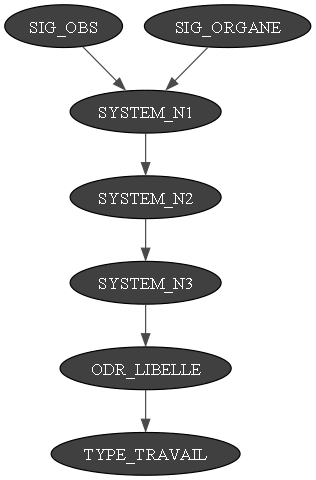

In [283]:
import pyAgrum.lib.ipython as gnb # 

gnb.showBN(rb_projet)


# Calcul des probabilite

In [284]:
def Create_Probabilite(df,element,all_element):
    longueur_df = len(df)
    count_element = []
    for liste in all_element:
        if liste in df[element].unique():
            count_element.append(len(df.loc[df[element] == liste]) / longueur_df)
        else: # On met un 0 si le champ n'est pas remplit, si la probabilité n'existe pas
            count_element.append(0)
    total_prob = sum(count_element)
    if total_prob == 0:
        return [1/len(count_element)]*len(count_element)
        
    return count_element

### Calcul des probabilité de SIG_ORGANE

In [285]:
rb_projet.cpt("SIG_ORGANE")[:] = Create_Probabilite(ot_odr_df,"SIG_ORGANE",ot_odr_df["SIG_ORGANE"].unique())

rb_projet.cpt("SIG_ORGANE")


(pyAgrum.Potential<double>@0000019D10521970) 
  SIG_ORGANE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Calcul des probabilité de SIG_OBS

In [286]:
rb_projet.cpt("SIG_OBS")[:] = Create_Probabilite(ot_odr_df,"SIG_OBS",ot_odr_df["SIG_OBS"].unique())

rb_projet.cpt("SIG_OBS")

(pyAgrum.Potential<double>@0000019D10521D90) 
  SIG_OBS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
DEBOITE  |ABSENT   |VIBRE    |CASSE    |BLOQUE   |ENFONCE  |DESSERRE |RAYE     |LACERE   |INTERRUPT|MANQUE   |ODEUR    |CLAQUE   |FERME MAL|FONCTIONN|VOYANT AL|ARRACHE  |NE FONCTI|INSUFFISA|FUITE    |DUR      |FUME_CHAU|ASPIRER  |BRUYANT  |DEGONFLE |VOYANT HS|JEU      |TAGUE    |BRUTAL   |USE_VIDE |INTERMITT|CLIGNOTE |BLESSE   |INCOMPLET|CALE     |FAUX CONT|BAL

### Calcul des probabilité de SIG_CONTEXTE

In [287]:
#rb_projet.cpt("SIG_CONTEXTE")[:] = Create_Probabilite(ot_odr_df,"SIG_CONTEXTE",ot_odr_df["SIG_CONTEXTE"].unique())
# Définir la largeur maximale des colonnes

#rb_projet.cpt("SIG_CONTEXTE")

In [288]:
#rb_projet.cpt("SIG_CONTEXTE")[{"SIG_CONTEXTE":'INTERIEUR_GAUCHE_ARRIERE'}]

### Calcul des probabilité de SYSTEM_N1 en fonction de SIG_ORGANE

In [289]:
'''
for liste_SIG in ot_odr_df['SIG_ORGANE'].unique():
    ot_odf_SIG_ORANE = ot_odr_df.loc[ot_odr_df['SIG_ORGANE'] == liste_SIG]
    liste_SIG = Delete_special_caractere(liste_SIG)

    rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE":liste_SIG}] = Create_Probabilite(ot_odf_SIG_ORANE,"SYSTEM_N1",ot_odr_df["SYSTEM_N1"].unique())

rb_projet.cpt("SYSTEM_N1")
'''

'\nfor liste_SIG in ot_odr_df[\'SIG_ORGANE\'].unique():\n    ot_odf_SIG_ORANE = ot_odr_df.loc[ot_odr_df[\'SIG_ORGANE\'] == liste_SIG]\n    liste_SIG = Delete_special_caractere(liste_SIG)\n\n    rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE":liste_SIG}] = Create_Probabilite(ot_odf_SIG_ORANE,"SYSTEM_N1",ot_odr_df["SYSTEM_N1"].unique())\n\nrb_projet.cpt("SYSTEM_N1")\n'

### Calcul des probabilité de SYSTEM_N1 en fonction de SIG_ORGANE et SIG_OBS

In [290]:
for sig_organe in ot_odr_df['SIG_ORGANE'].unique():
    ot_odf_sig_organe = ot_odr_df.loc[ot_odr_df['SIG_ORGANE'] == sig_organe]
    sig_organe = Delete_special_caractere(sig_organe)
    
    for sig_obs in ot_odr_df['SIG_OBS'].unique():
        ot_odf_sig_obs = ot_odf_sig_organe.loc[ot_odf_sig_organe['SIG_OBS'] == sig_obs]
        sig_obs = Delete_special_caractere(sig_obs)

        rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}] = Create_Probabilite(ot_odf_sig_obs, "SYSTEM_N1", ot_odr_df["SYSTEM_N1"].unique())

print(rb_projet.cpt("SYSTEM_N1"))



             ||  SYSTEM_N1                                                                                        |
SIG_OR|SIG_OB||EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|DIVERS   |
------|------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
GLACE_|DEBOIT|| 0.9943  | 0.0057  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
KLAXON|DEBOIT|| 0.2500  | 0.7500  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOITUR|DEBOIT|| 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  |
PARE_C|DEBOIT|| 0.7202  | 0.2599  | 0.0097  | 0.0005  | 0.0000  | 0.0005  | 0.0087  | 0.0000  | 0.0005  | 0.0000  |
SECURI|DEBOIT|| 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  |
VOLANT|DEBOIT|| 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.1000  | 0.100

### Calcul des probabilité de SYSTEM_N2 en fonction de SYSTEM_N1

In [291]:
for liste_N1 in ot_odr_df['SYSTEM_N1'].unique():
    ot_odf_SYSTEM_N1 = ot_odr_df.loc[ot_odr_df['SYSTEM_N1'] == liste_N1]
    liste_N1 = Delete_special_caractere(liste_N1)

    rb_projet.cpt("SYSTEM_N2")[{"SYSTEM_N1":liste_N1}] = Create_Probabilite(ot_odf_SYSTEM_N1,"SYSTEM_N2",ot_odr_df["SYSTEM_N2"].unique())
rb_projet.cpt("SYSTEM_N2")

(pyAgrum.Potential<double>@0000019D10521B10) 
      ||  SYSTEM_N2                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
SYSTEM||VITRAGE  |ECLAIRAGE|EQUIPEMEN|ELEMENT C|PORTE    |INFORMATI|VENTILATI|LIAISON A|FREIN D E|ACCESSOIR|MOTEUR TH|DEPOLLUTI|CHASSIS  |FREIN PRI|BOITE DE |ARTICULAT|CIRCUIT D|TRANSMISS|CLIMATISA|CIRCUIT D|AMENAGEME|CIRCUIT D|CIRCUIT D|REFROIDIS|CIRCUIT D|CIRCUIT D|CIRCUIT D|CHAUFFAGE|CIRCUIT D|FREIN DE |_        |POSTE DE |ACCESSIBI|INDICATEU|CIRCUIT D|AIDE A L |STOCKAGE |CIRCUIT D|SECURITE |TELEBILLE|MAINTENAN|ENERGIE T|MOTEUR EL|CIRCUIT D|FREIN SEC|
------||---------|---------|--------

### Calcul des probabilité de SYSTEM_N3 en fonction de SYSTEM_N2

In [292]:
for liste_N2 in ot_odr_df['SYSTEM_N2'].unique():
    ot_odf_SYSTEM_N2 = ot_odr_df.loc[ot_odr_df['SYSTEM_N2'] == liste_N2]
    liste_N2 = Delete_special_caractere(liste_N2)
    rb_projet.cpt("SYSTEM_N3")[{"SYSTEM_N2":liste_N2}] = Create_Probabilite(ot_odf_SYSTEM_N2,"SYSTEM_N3",ot_odr_df["SYSTEM_N3"].unique())
rb_projet.cpt("SYSTEM_N3")

(pyAgrum.Potential<double>@0000019D10521830) 
      ||  SYSTEM_N3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Calcul des probabilité de ODR_LIBELLE en fonction de SYSTEM_N3

In [293]:
for liste_N3 in ot_odr_df['SYSTEM_N3'].unique():
    ot_odf_SYSTEM_N3 = ot_odr_df.loc[ot_odr_df['SYSTEM_N3'] == liste_N3]
    liste_N3 = Delete_special_caractere(liste_N3)
    rb_projet.cpt("ODR_LIBELLE")[{"SYSTEM_N3":liste_N3}] = Create_Probabilite(ot_odf_SYSTEM_N3,"ODR_LIBELLE",ot_odr_df["ODR_LIBELLE"].unique())
rb_projet.cpt("ODR_LIBELLE")

(pyAgrum.Potential<double>@0000019D10521AB0) 
      ||  ODR_LIBELLE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### Calcul des probabilité de TYPE_TRAVAIL en fonction de ODR_LIBELLE

In [294]:
for liste_ODR_LIBELLE in ot_odr_df['ODR_LIBELLE'].unique():
    ot_odf_ODR_LIBELLE = ot_odr_df.loc[ot_odr_df['ODR_LIBELLE'] == liste_ODR_LIBELLE]
    liste_ODR_LIBELLE = Delete_special_caractere(liste_ODR_LIBELLE)
    rb_projet.cpt("TYPE_TRAVAIL")[{"ODR_LIBELLE":liste_ODR_LIBELLE}] = Create_Probabilite(ot_odf_ODR_LIBELLE,"TYPE_TRAVAIL",ot_odr_df["TYPE_TRAVAIL"].unique())
rb_projet.cpt("TYPE_TRAVAIL")

(pyAgrum.Potential<double>@0000019D10521EB0) 
      ||  TYPE_TRAVAIL                                                                                                         |
ODR_LI||CARROSSER|ELECTRICI|MECANIQUE|MISE AU P|EQUIPEMEN|EXTINCTEU|STATION S|ROUE     |CLIMATISA|BATTERIE |DIVERS   |CONTROLE |
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
REMPLA|| 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
REMPLA|| 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
REMPLA|| 0.0000  | 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
REMPLA|| 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
REMPLA|| 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.

### Calcul des probabilité de DUREE_TRAVAIL en fonction de ODR_LIBELLE

In [295]:
'''
for liste_ODR_LIBELLE in ot_odr_df['ODR_LIBELLE'].unique():
    ot_odf_ODR_LIBELLE = ot_odr_df.loc[ot_odr_df['ODR_LIBELLE'] == liste_N3]
    liste_ODR_LIBELLE = Delete_special_caractere(liste_ODR_LIBELLE)
    rb_projet.cpt("DUREE_TRAVAIL")[{"ODR_LIBELLE":liste_ODR_LIBELLE}] = Create_Probabilite(ot_odf_ODR_LIBELLE,"DUREE_TRAVAIL",ot_odr_df["DUREE_TRAVAIL"].unique())
rb_projet.cpt("DUREE_TRAVAIL")
'''

'\nfor liste_ODR_LIBELLE in ot_odr_df[\'ODR_LIBELLE\'].unique():\n    ot_odf_ODR_LIBELLE = ot_odr_df.loc[ot_odr_df[\'ODR_LIBELLE\'] == liste_N3]\n    liste_ODR_LIBELLE = Delete_special_caractere(liste_ODR_LIBELLE)\n    rb_projet.cpt("DUREE_TRAVAIL")[{"ODR_LIBELLE":liste_ODR_LIBELLE}] = Create_Probabilite(ot_odf_ODR_LIBELLE,"DUREE_TRAVAIL",ot_odr_df["DUREE_TRAVAIL"].unique())\nrb_projet.cpt("DUREE_TRAVAIL")\n'

# Affichage

### Affichage Tableau

In [316]:
def Calcul_probabilite(texte_1,texte_2,sig_organe,sig_obs,rb_projet,dictionnaire):
    colonnes_N1 = ot_odr_df[texte_1].unique()
    # Calculer la probabilité conditionnelle pour SYSTEM_N1
    proba_system = rb_projet.cpt(texte_2)[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}]
    dictionnaire[texte_2] = {}
    proba_system_liste = []
    for colonne in colonnes_N1:
        for liste in proba_system:
            somme = 0
            for l in liste:
                somme += dictionnaire[texte_1][colonne] * l
            proba_system_liste.append(somme)

    colonnes_N2 = ot_odr_df[texte_2].unique()
    # Afficher les lignes du tableau avec les noms de colonnes et les probabilités
    for colonne, probabilite in zip(colonnes_N2, proba_system_liste):
        dictionnaire[texte_2][colonne] = probabilite
    return dictionnaire



def afficher_probabilites_tableau(sig_organe,sig_obs,rb_projet):
    dictionnaire = {}
    # Définir la valeur choisie pour SIG_ORGANE
    rb_projet.cpt("SIG_ORGANE")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}] = 1.0
    colonnes_N1 = ot_odr_df['SYSTEM_N1'].unique()
    # Calculer la probabilité conditionnelle pour SYSTEM_N1
    proba_system_n1 = rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}]

    dictionnaire['SYSTEM_N1'] = {}
    # Afficher les lignes du tableau avec les noms de colonnes et les probabilités
    for colonne, probabilite in zip(colonnes_N1, proba_system_n1):
        dictionnaire['SYSTEM_N1'][colonne] = probabilite

    dictionnaire = Calcul_probabilite('SYSTEM_N1','SYSTEM_N2',sig_organe,sig_obs,rb_projet,dictionnaire)
    dictionnaire = Calcul_probabilite('SYSTEM_N2','SYSTEM_N3',sig_organe,sig_obs,rb_projet,dictionnaire)
    dictionnaire = Calcul_probabilite('SYSTEM_N3','ODR_LIBELLE',sig_organe,sig_obs,rb_projet,dictionnaire)
    dictionnaire = Calcul_probabilite('ODR_LIBELLE','TYPE_TRAVAIL',sig_organe,sig_obs,rb_projet,dictionnaire)
    return dictionnaire

sig_organe_choisi = "ECLAIRAGE FEUX EXTERIEURS"
sig_obs_choisi = "CASSE"
# sig_obs_choisi = "NE FONCTIONNE PAS"

dictionnaire = afficher_probabilites_tableau(sig_organe_choisi,sig_obs_choisi,rb_projet)
print(dictionnaire)
print(dictionnaire['SYSTEM_N1'])
print(dictionnaire['SYSTEM_N2'])





{'SYSTEM_N1': {'EQUIPEMENT DE CARROSSERIE': 0.034760352634917856, 'EQUIPEMENT ELECTRIQUE': 0.9635114737601995, 'EQUIPEMENT CHASSIS': 0.000459387920285258, 'EQUIPEMENT EMBARQUE': 0.00026250738302014743, 'EQUIPEMENT CLIMATIQUE': 0.00035000984402686324, 'EQUIPEMENT DE FREINAGE': 2.1875615251678953e-05, 'EQUIPEMENT DE MOTORISATION': 0.000503139150788616, 'EQUIPEMENT DE TRANSMISSION': 0.0, 'EQUIPEMENT PNEUMATIQUE': 0.00013125369151007372, 'DIVERS': 0.0}, 'SYSTEM_N2': {'VITRAGE': 0.03476035263491786, 'ECLAIRAGE-SIGNALISATION': 0.034760352634917856, 'EQUIPEMENT DE DIRECTION': 0.034760352634917856, 'ELEMENT CARROSSERIE EXT': 0.034760352634917856, 'PORTE': 0.034760352634917856, 'INFORMATION VOYAGEUR': 0.03476035263491785, 'VENTILATION': 0.034760352634917856, 'LIAISON AU SOL': 0.034760352634917856, "FREIN D'EXPLOITATION": 0.034760352634917856, 'ACCESSOIRE DE VISIBILITE': 0.034760352634917856, 'MOTEUR THERMIQUE': 0.9635114737601995, 'DEPOLLUTION': 0.9635114737601996, 'CHASSIS': 0.9635114737601996

In [318]:
print(dictionnaire['ODR_LIBELLE'])


{"REMPLACEMENT D'UNE GLACE LAT VOYAGEUR": 0.03476035263491786, "REMPLACEMENT D'UN COMMODO DE SIGNALISATION": 0.03476035263491786, "REMPLACEMENT D'UN CARDAN DE LIAISON SUR CREMAILLERE DE DIRECTION": 0.03476035263491786, "REMPLACEMENT D'UN PARE-CHOCS AVG": 0.03476035263491786, "REMPLACEMENT D'UN POTENTIOMETRE DE PORTE NUMERO 1": 0.03476035263491787, "REMPLACEMENT D'UN ENJOLIVEUR D'OPTIQUE": 0.03476035263491786, "REMPLACEMENT D'UN PARE-CHOCS AVD": 0.03476035263491786, 'REMPLACEMENT DE LA POIGNEE DE BLOCAGE DU VOLANT DE DIRECTION': 0.03476035263491786, "REMPLACEMENT D'UN HABILLAGE INT DE BAIE": 0.03476035263491786, "REMPLACEMENT D'UNE TOILE DE GIROUETTE": 0.03476035263491786, "REMPLACEMENT D'UN INTERRUPTEUR DE COMMANDE DE PORTES AV": 0.03476035263491787, "REMPLACEMENT D'UN FEU AR COMPLET": 0.03476035263491786, 'REMPLACEMENT DES FILTRES ET NETTOYAGE DES BUSES DE LA VENTILATION MECANIQUE': 0.03476035263491787, "REMPLACEMENT D'UN REGLEUR DE DEBIT DE PORTE": 0.03476035263491786, "REMPLACEMENT 

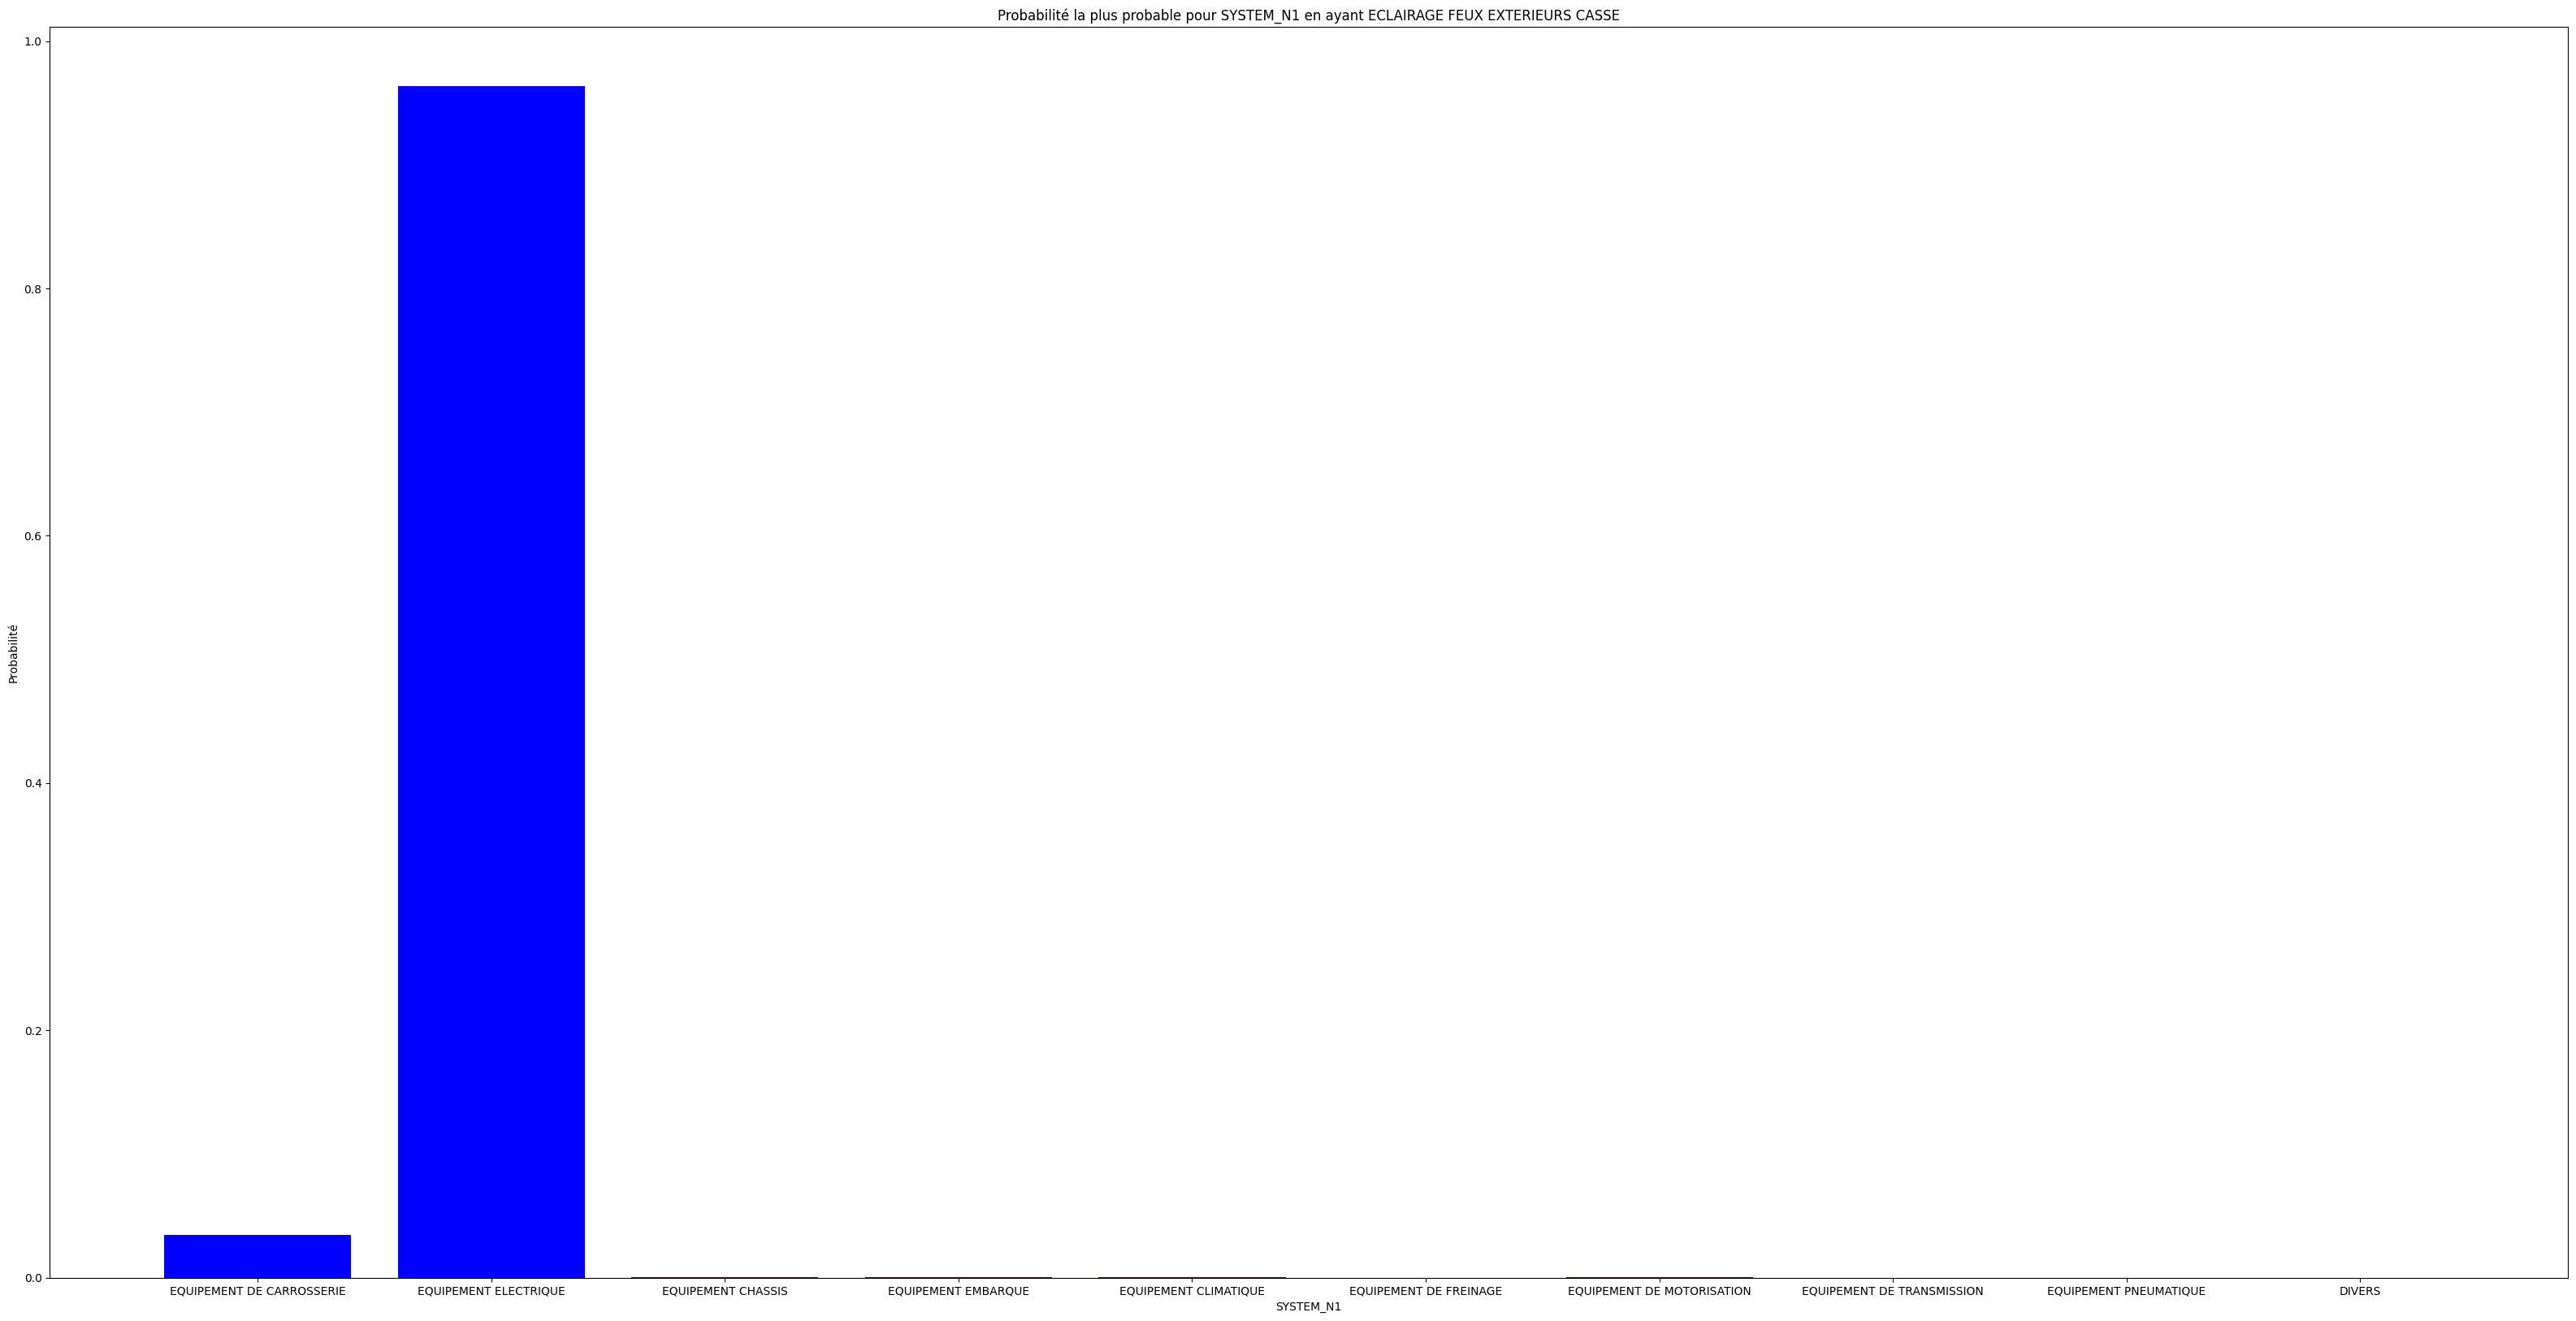

In [297]:
import matplotlib.pyplot as plt

def afficher_probabilites(sig_organe,sig_obs,rb_projet):
    # Définir la valeur choisie pour SIG_ORGANE
    rb_projet.cpt("SIG_ORGANE")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}] = 1.0
    colonne = ot_odr_df['SYSTEM_N1'].unique()
    # Calculer la probabilité conditionnelle pour SYSTEM_N1
    proba_system_n1 = rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}]

    # Afficher la probabilité pour SYSTEM_N1 avec une taille de figure plus grande
    plt.figure(figsize=(40, 20))
    plt.bar(colonne, proba_system_n1, color='blue')
    plt.title(str("Probabilité la plus probable pour SYSTEM_N1 en ayant " + sig_organe_choisi + " " + sig_obs))
    plt.xlabel("SYSTEM_N1")
    plt.ylabel("Probabilité")
    plt.show()
    

sig_organe_choisi = "ECLAIRAGE FEUX EXTERIEURS"
sig_obs_choisi = "CASSE"
afficher_probabilites(sig_organe_choisi,sig_obs_choisi,rb_projet)
